
# What happens when ANNs are applied out of bound?


In [217]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU





## Generate test data

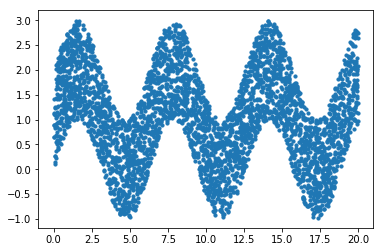

In [218]:
n = 4000
split_elem = 3000
beta = 20
noise = 2
x = np.random.random(n) * beta
x = np.sort(x)
y = np.sin(x) + np.random.random(n) * noise

plt.scatter(x, y, s = 10)




## Normalization


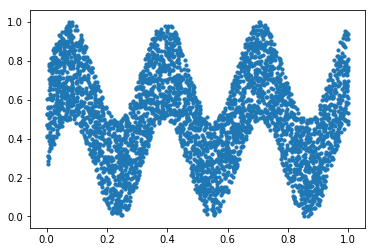

In [219]:
dataset = np.transpose(np.array([x,y]))

scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

plt.scatter(dataset_scaled[:,0], dataset_scaled[:,1], s = 10)
       




## Split in training and test dataset

Training dataset will adapt model parameters.

Test parameter set is used to check model quality.

Test dataset should only be used once!



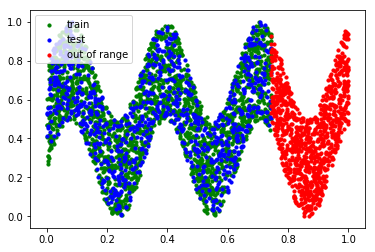

In [220]:
dataset_out_of_range = dataset_scaled[split_elem:dataset_scaled.shape[0],:]
dataset_production = dataset_scaled[0:split_elem,:]

train, test = train_test_split(dataset_production,train_size=0.7,test_size=0.3)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train[:,0], train[:,1], s = 10, c = "green", label = "train")
ax1.scatter(test[:,0], test[:,1], s = 10, c = "blue", label = "test")
ax1.scatter(dataset_out_of_range[:,0], dataset_out_of_range[:,1], s = 10, c = "red", label = "out of range")
plt.legend(loc='upper left');
plt.show()


       

## Training model

Train on 1680 samples, validate on 949 samples
Epoch 1/20
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0546 - acc: 5.9524e-04 - val_loss: 0.0455 - val_acc: 0.0000e+00
Epoch 2/20
1680/1680 [==============================] - 4s 3ms/step - loss: 0.0471 - acc: 5.9524e-04 - val_loss: 0.0472 - val_acc: 0.0000e+00
Epoch 3/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.0465 - acc: 5.9524e-04 - val_loss: 0.0429 - val_acc: 0.0000e+00
Epoch 4/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.0466 - acc: 5.9524e-04 - val_loss: 0.0430 - val_acc: 0.0000e+00
Epoch 5/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.0461 - acc: 5.9524e-04 - val_loss: 0.0425 - val_acc: 0.0000e+00
Epoch 6/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.0462 - acc: 5.9524e-04 - val_loss: 0.0424 - val_acc: 0.0000e+00
Epoch 7/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.0457 - acc: 5.9524e-04 

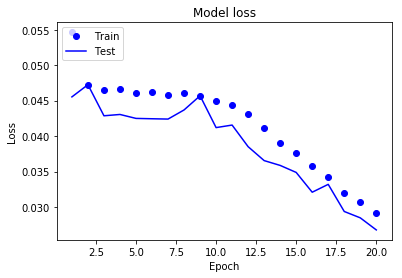

In [221]:
model = Sequential()
model.add(Dense(20 , activation = 'tanh', input_dim = 1))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(20 , activation = 'tanh', input_dim = 1))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(1, activation = 'tanh'))
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

x = train[:,0]
y = train[:,1]

index = np.random.randint(0, len(x), round(0.8 * len(x)))
        
x_t = x[index]
y_t = y[index]
         
mask = np.ones(len(x),dtype=bool) #np.ones_like(a,dtype=bool)
mask[index] = False
         
x_val = x[mask]
y_val = y[mask]

epochs = 20

history = model.fit(x_t, y_t, epochs = epochs, batch_size = 1, validation_data = (x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



## Plot prediction

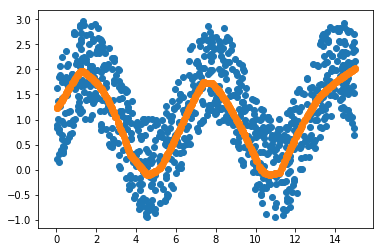

array([[1.        , 0.74685694],
       [0.74685694, 1.        ]])

In [199]:
x_test = test[:,0:(test.shape[1]-1)]
y_predict_test = model.predict(x_test, batch_size = 1)
y_predict_test.shape = (len(y_predict_test))

dataset_invert = np.copy(test)
dataset_invert[:, dataset_invert.shape[1]-1] = y_predict_test
y_predict_test = scaler.inverse_transform(dataset_invert)[:, dataset_invert.shape[1]-1]
         
test_tf = scaler.inverse_transform(test)
x_original = test_tf[:, 0]
y_original = test_tf[:, test_tf.shape[1]-1]

plt.scatter(x_original, y_original)
plt.scatter(x_original, y_predict_test)
plt.show()

np.corrcoef(y_original, y_predict_test)
    

         


# Cool, let's take this result and apply it a little bit out of range.


(4000,)
(4000,)
(1000, 2)


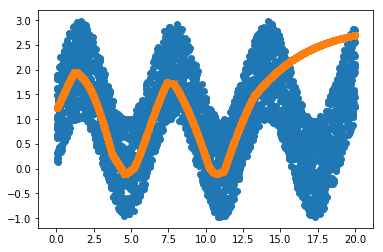

array([[1.        , 0.33267695],
       [0.33267695, 1.        ]])

In [209]:
x_test = dataset_scaled[:, 0:(dataset_scaled.shape[1]-1)]
y_predict_test = model.predict(x_test, batch_size = 1)
y_predict_test.shape = (len(y_predict_test))

dataset_invert = np.copy(dataset_scaled)
dataset_invert[:,dataset_invert.shape[1]-1] = y_predict_test
y_predict_test = scaler.inverse_transform(dataset_invert)[:, dataset_invert.shape[1]-1]

test_tf = scaler.inverse_transform(dataset_scaled)
x_original = test_tf[:, 0]
y_original = test_tf[:, test_tf.shape[1]-1]

plt.scatter(x_original, y_original)
plt.scatter(x_original, y_predict_test)
plt.show()

print(np.corrcoef(y_original, y_predict_test))
    